基于 mnist 数据集，建立 MLP 模型，实现 0-9 数字的十分类 task:
1、实现 mnist 数据载入，可视化图形数字;
2、完成数据预处理: 图像数据维度转换与归一化、输出结果格式转换;
3、计算模型在预测数据集的准确率;
4、模型结构: 两层隐藏层，每层有 392 个神经元

In [17]:
# load the mnist data
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (60000, 28, 28)


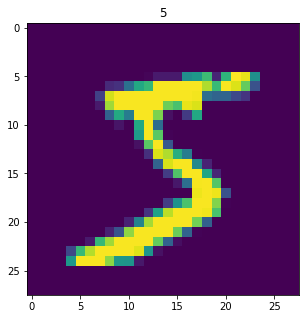

In [3]:
# visualize the data
img1 = X_train[0]
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
plt.imshow(img1)
plt.title(y_train[0])
plt.show()

In [6]:
# format the input data
feature_size = img1.shape[0] * img1.shape[1]
X_train_format = X_train.reshape(X_train.shape[0], feature_size)
X_test_format = X_test.reshape(X_test.shape[0], feature_size)
print(X_test_format.shape)

(10000, 784)


In [12]:
# normalize the input data
X_train_normal = X_train_format / 255
X_test_normal = X_test_format / 255

In [8]:
# format the output data(labels)
from keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# set up the model
from keras.models import Sequential
from keras.layers import Dense, Activation
mlp = Sequential()
mlp.add(Dense(units = 392, activation='sigmoid', input_dim = feature_size))
mlp.add(Dense(units = 392, activation='sigmoid'))
mlp.add(Dense(units = 10, activation='softmax'))
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 392)               154056    
                                                                 
 dense_2 (Dense)             (None, 10)                3930      
                                                                 
Total params: 465,706
Trainable params: 465,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
# configure the model
mlp.compile(loss='categorical_crossentropy', optimizer = 'adam')

In [13]:
# train the model
mlp.fit(X_train_normal, y_train_format, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3470
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1443
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0924
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0658
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0478
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0261
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0210
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0168
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0138


In [20]:
# evaluate the model
y_train_predict = mlp.predict(X_train_normal)
y_train_predict = np.argmax(y_train_predict, axis = 1)
print(y_train_predict.shape)
print(y_train_predict[0])

1875/1875 [==============================] - 4s 2ms/step
(60000,)
5


In [21]:
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train, y_train_predict)
print(accuracy_train)

0.9924333333333333


In [22]:
y_test_predict = mlp.predict(X_test_normal)
y_test_predict = np.argmax(y_test_predict, axis = 1)
print(y_test_predict.shape)
print(y_test_predict[0])

313/313 [==============================] - 1s 2ms/step
(10000,)
7


In [23]:
accuracy_test = accuracy_score(y_test, y_test_predict)
print(accuracy_test)

0.9764


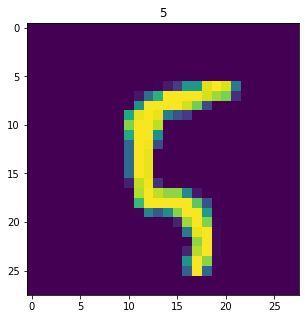

In [26]:
img2 = X_train[100]
fig2 = plt.figure(figsize=(5, 5))
plt.imshow(img2)
plt.title(y_train_predict[100])
plt.show()

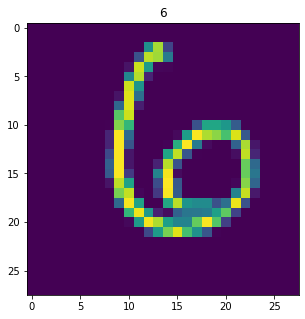

In [27]:
img3 = X_test[100]
fig3 = plt.figure(figsize=(5, 5))
plt.imshow(img3)
plt.title(y_test_predict[100])
plt.show()